# Data Analysis and Visualization of Computer Mouse Movement

This code was developed to analyze data and generate figures for "Evaluating Mouse Control and Usability Patterns Across Tremor and Non-Tremor Populations"

### Loading necessary libraries

In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

### Cursor Data for Exemplar Participants

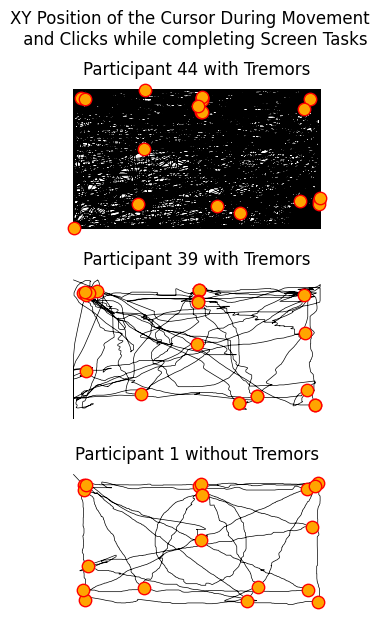

In [6]:
# Load cursor data
P39 = pd.read_csv("./data/positions_39.txt", sep='\t', header=None, names=['time', 'X', 'Y'])
P44 = pd.read_csv("./data/positions_44.txt", sep='\t', header=None, names=['time', 'X', 'Y'])
P1 = pd.read_csv("./data/positions_1.txt", sep='\t', header=None, names=['time', 'X', 'Y'])

# Find Position of Clicks
P39_clicks = P39[P39['time'] == 'Mouse Click'].index
P44_clicks = P44[P44['time'] == 'Mouse Click'].index
P1_clicks = P1[P1['time'] == 'Mouse Click'].index

P39_clicks = P39.loc[P39_clicks-1]
P44_clicks = P44.loc[P44_clicks-1]
P1_clicks = P1.loc[P1_clicks-1]

# Plot
fig = plt.figure(figsize=(3.5, 7))
fig.suptitle('XY Position of the Cursor During Movement \n and Clicks while completing Screen Tasks') 

# Time Domain
ax = plt.subplot(3, 1, 1)
plt.plot(P39['X'], P39['Y'], linewidth=0.5, color='black')
plt.scatter(P39_clicks['X'], P39_clicks['Y'],
            color='orange',       # solid fill
            edgecolors='red', # optional border
            s=80,               # marker size
            marker='o',         # filled circle
            zorder=2)          # fully opaque

plt.title("Participant 44 with Tremors")
plt.axis('off')
ax.set_aspect('equal')
ax.invert_yaxis()

ax = plt.subplot(3, 1, 2)
plt.plot(P44['X'], P44['Y'], linewidth=0.5, color='black')
plt.scatter(P44_clicks['X'], P44_clicks['Y'],
            color='orange',       # solid fill
            edgecolors='red', # optional border
            s=80,               # marker size
            marker='o',         # filled circle
            zorder=2)          # fully opaque

plt.title("Participant 39 with Tremors")
plt.axis('off')
ax.set_aspect('equal')
ax.invert_yaxis()

ax = plt.subplot(3, 1, 3)
plt.plot(P1['X'], P1['Y'], linewidth=0.5, color='black')
plt.scatter(P1_clicks['X'], P1_clicks['Y'],
            color='orange',       # solid fill
            edgecolors='red', # optional border
            s=80,               # marker size
            marker='o',         # filled circle
            zorder=2)          # fully opaque

plt.title('Participant 1 without Tremors')
plt.axis('off')
ax.set_aspect('equal')
ax.invert_yaxis()


## Cursor Data for Selected Participant 

(np.float64(-94.5),
 np.float64(1984.5),
 np.float64(1036.35),
 np.float64(-49.35))

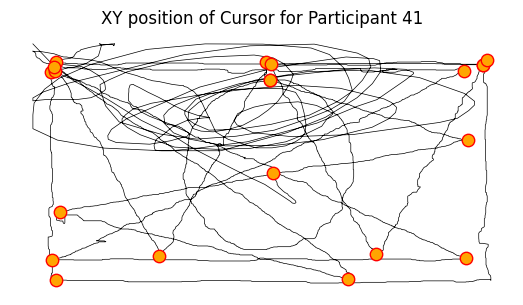

In [10]:
participant = '41'

# Load Cursor Data
cursor = pd.read_csv("./data/positions_" + participant + ".txt", sep='\t', header=None, names=['time', 'X', 'Y'])
# Identify Times of Clicks
clicks = cursor[cursor['time'] == 'Mouse Click'].index
clicks = cursor.loc[clicks-1]
# Remove non-numerical rows (i.e. ones that state 'Mouse Click')
cursor.dropna(inplace=True)
# Change time to a numeric
cursor['time'] = pd.to_numeric(cursor['time'])
# Offset time by first click so that the IMU and Cursor data are aligned
cursor['time'] = cursor['time'] - float(clicks.iloc[0]['time'])

# Plot
fig = plt.figure(figsize=(6.5, 5))
ax = plt.subplot(1, 1, 1)

plt.plot(cursor['X'], cursor['Y'], linewidth=0.5, color='black')
plt.scatter(clicks['X'], clicks['Y'],
            color='orange',       # solid fill
            edgecolors='red', # optional border
            s=80,               # marker size
            marker='o',         # filled circle
            zorder=2)          # fully opaque
ax.invert_yaxis()
ax.set_aspect('equal')
plt.title('XY position of Cursor for Participant ' + str(participant))
plt.axis('off')
 